In [1]:
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install pydotplus
!pip install numpy
!pip install pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import pydotplus

In [103]:
weather_df = pd.read_csv('weather3.csv')
columns = weather_df.columns
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [104]:
# Size of data
weather_df.shape

(145460, 23)

In [105]:
# Data description of all the columns
weather_df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135198.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-06-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.031554,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.615465,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,-33.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [106]:
"""From count column its possible to see that not all the columns have values in all the rows, 
lets check in which columns are missing values."""
weather_df.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135198
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

In [107]:
"""We can see that the first four columns have less than 60% of the dataset rows, 
so there are no important to do the prediction so we can drop them. Also Location and Date we can delete, because
they are no relevant to predict if it will rain tomorrow."""

weather_df = weather_df.drop(columns=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Date', 'Location'], axis=1)
weather_df.shape

(145460, 17)

In [109]:
"""From the upper values we can see that in every column there is missing data, 
so we are going to delete the rows that contains some nan value."""

weather_df = weather_df.dropna()
weather_df.count().sort_values()

MinTemp          112925
Temp3pm          112925
Temp9am          112925
Pressure3pm      112925
Pressure9am      112925
Humidity3pm      112925
Humidity9am      112925
RainToday        112925
WindSpeed3pm     112925
WindDir3pm       112925
WindDir9am       112925
WindGustSpeed    112925
WindGustDir      112925
Rainfall         112925
MaxTemp          112925
WindSpeed9am     112925
RainTomorrow     112925
dtype: int64

In [110]:
weather_df.shape

(112925, 17)

In [111]:
weather_df.describe(include='all')

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,112925.000000,112925.000000,112925.000000,112925,112925.000000,112925,112925,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925,112925
unique,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,NaN,NaN,NaN,8380,NaN,9815,8325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87556,87906
mean,12.664721,23.655670,2.377892,NaN,40.783396,NaN,NaN,15.179163,19.500545,67.404162,50.669055,1017.425847,1015.048962,17.462008,22.127306,NaN,NaN
std,6.254135,6.982702,8.602968,NaN,13.329173,NaN,NaN,8.344304,8.580097,18.911610,20.768550,7.032654,6.957822,6.355045,6.837380,NaN,NaN
min,-8.200000,2.600000,0.000000,NaN,-33.000000,NaN,NaN,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-3.100000,1.700000,NaN,NaN
25%,8.100000,18.300000,0.000000,NaN,31.000000,NaN,NaN,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.300000,12.700000,16.900000,NaN,NaN
50%,12.400000,23.100000,0.000000,NaN,39.000000,NaN,NaN,13.000000,19.000000,68.000000,51.000000,1017.400000,1015.000000,17.100000,21.600000,NaN,NaN
75%,17.200000,28.700000,0.800000,NaN,48.000000,NaN,NaN,20.000000,24.000000,81.000000,65.000000,1022.100000,1019.700000,22.000000,26.900000,NaN,NaN


In [112]:
# WindGustDir has 16 unique values

unique_WindGustDir_values = weather_df['WindGustDir'].unique()
unique_WindGustDir_values

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [113]:
# WindDir9am has 16 unique values

unique_WindDir9am_values = weather_df['WindDir9am'].unique()
unique_WindDir9am_values

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'SSW', 'N', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [114]:
# WindDir3pm has 16 unique values

unique_WindDir3pm_values = weather_df['WindDir3pm'].unique()
unique_WindDir3pm_values

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [115]:
# Convert categorical columns in numerical

weather_df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)
weather_df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)
weather_df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
145455,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


In [116]:
np.sort(unique_WindGustDir_values)

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

In [117]:
np.sort(unique_WindDir9am_values)

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

In [118]:
np.sort(unique_WindDir3pm_values)

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

In [119]:
""" We can see that WindGustDir, WindDir9am_num, WindDir3pm have the same values I choose to convert them to numerical
values in order so they will be easy to know on which value we are working."""
wind_dict = np.sort(unique_WindGustDir_values)
weather_df['WindGustDir_num'] = pd.Categorical(weather_df['WindGustDir'], ordered=True, categories= wind_dict).codes
weather_df['WindDir9am_num'] = pd.Categorical(weather_df['WindDir9am'], ordered=True, categories= wind_dict).codes
weather_df['WindDir3pm_num'] = pd.Categorical(weather_df['WindDir3pm'], ordered=True, categories= wind_dict).codes
weather_df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_num,WindDir9am_num,WindDir3pm_num
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,13,13,14
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,14,6,15
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,15,13,15
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,4,9,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,13,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0,0,2,0
145455,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0,0,9,1
145456,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0,6,9,3
145457,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0,3,9,14


In [120]:
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_num,WindDir9am_num,WindDir3pm_num
count,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000
mean,12.664721,23.655670,2.377892,40.783396,15.179163,19.500545,67.404162,50.669055,1017.425847,1015.048962,17.462008,22.127306,0.224654,0.221554,7.720655,7.237618,7.759478
std,6.254135,6.982702,8.602968,13.329173,8.344304,8.580097,18.911610,20.768550,7.032654,6.957822,6.355045,6.837380,0.417356,0.415294,4.673142,4.550401,4.615792
min,-8.200000,2.600000,0.000000,-33.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-3.100000,1.700000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.100000,18.300000,0.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.300000,12.700000,16.900000,0.000000,0.000000,3.000000,3.000000,4.000000
50%,12.400000,23.100000,0.000000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.400000,1015.000000,17.100000,21.600000,0.000000,0.000000,8.000000,7.000000,8.000000
75%,17.200000,28.700000,0.800000,48.000000,20.000000,24.000000,81.000000,65.000000,1022.100000,1019.700000,22.000000,26.900000,0.000000,0.000000,12.000000,11.000000,12.000000
max,33.900000,48.100000,367.600000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000,15.000000,15.000000,15.000000


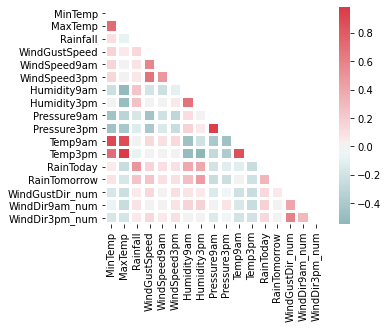

In [144]:
corr = weather_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=2.5)
plt.show()

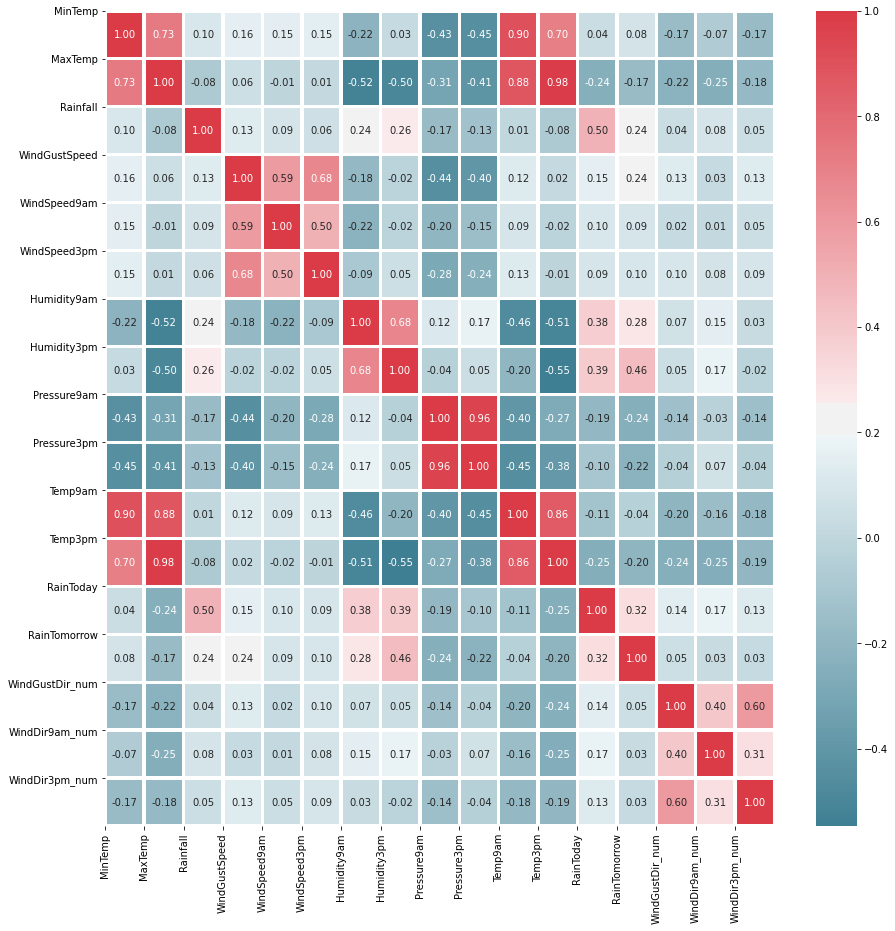

In [145]:
# corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", linewidths=2.5)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

/Users/martinmazas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  )


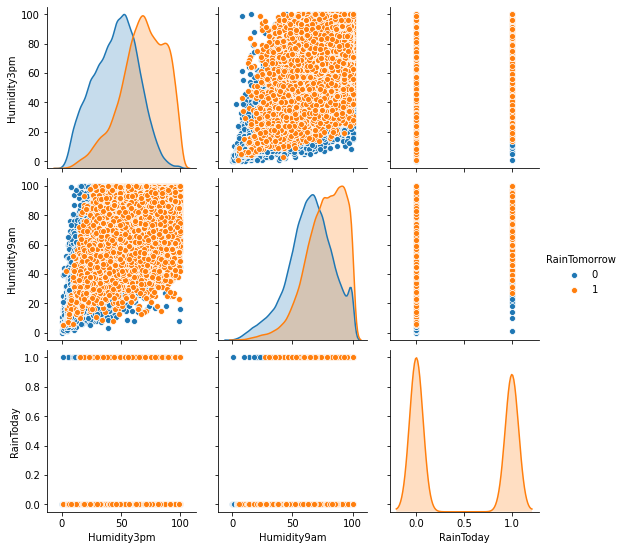

In [131]:
sns.pairplot(weather_df[['Humidity3pm', 'Humidity9am', 'RainToday', 'RainTomorrow']], hue='RainTomorrow', height=2.5)
plt.show()

In [141]:
weather_df.drop(columns=['WindDir3pm_num', 'WindDir3pm', 'WindDir9am_num', 'WindDir9am', 'WindGustDir', 'WindGustDir_num'])

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0
